<div align="center">

# Assignment 10

---

**Author:** Matthew Walczyk  
**Date:** 10/28/2024  
**Modified By:** Matthew Walczyk  
**Description:** This program contains my week 10 exercises using numpy pandas matplotlib itertools and stock_analysis

---
</div>

In [39]:
import stock_analysis
from stock_analysis.utils import group_stocks
from stock_analysis.utils import make_portfolio
from stock_analysis.utils import make_portfolio
from matplotlib.ticker import StrMethodFormatter
import numpy as np
import pandas as pd
from scipy.signal import argrelextrema
import itertools

Text(0, 0.5, 'price ($)')

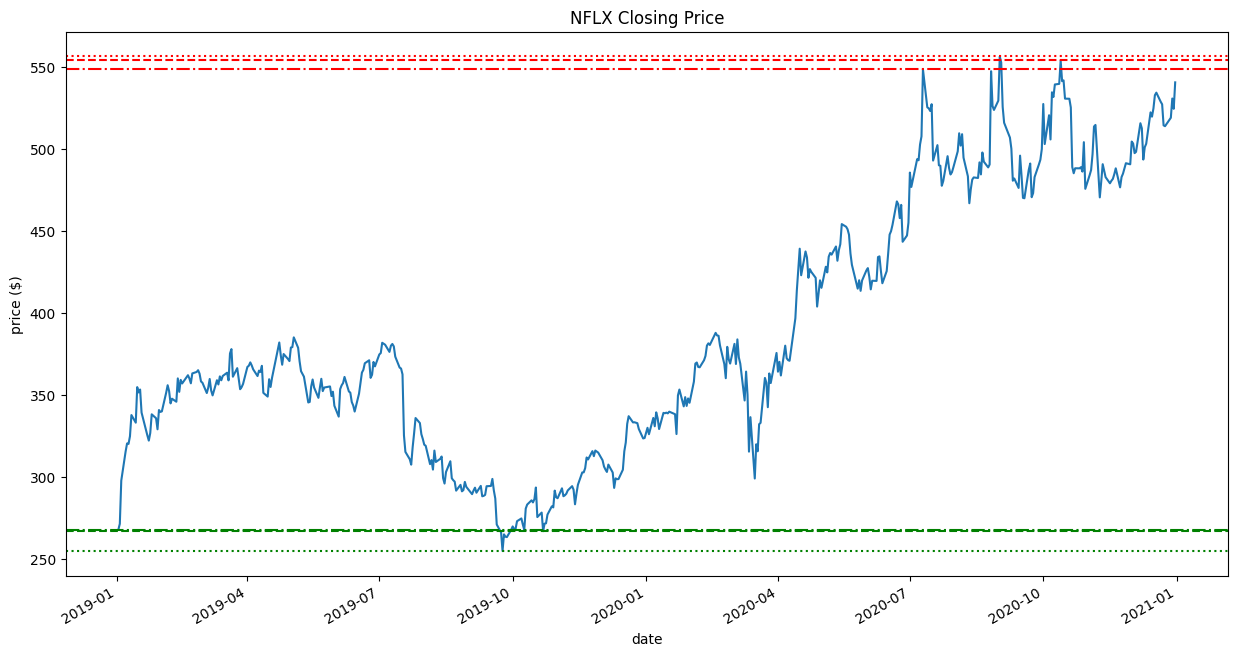

In [40]:

start_date, end_date = '2019-01-01', '2020-12-31'

# Read Bitcoin data
bitcoin = pd.read_csv('https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/refs/heads/master/ch_07/data/bitcoin.csv', parse_dates=['date'], index_col='date')
bitcoin = bitcoin.loc[start_date:end_date]

# Read FAANG data
fb = pd.read_csv('https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/refs/heads/master/ch_07/data/facebook.csv', parse_dates=['date'], index_col='date')
aapl = pd.read_csv('https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/refs/heads/master/ch_07/data/apple.csv', parse_dates=['date'], index_col='date')
amzn = pd.read_csv('https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/refs/heads/master/ch_07/data/amazon.csv', parse_dates=['date'], index_col='date')
nflx = pd.read_csv('https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/refs/heads/master/ch_07/data/netflix.csv', parse_dates=['date'], index_col='date')
goog = pd.read_csv('https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/refs/heads/master/ch_07/data/google.csv', parse_dates=['date'], index_col='date')

# Read S&P 500 data
sp = pd.read_csv('https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/refs/heads/master/ch_07/data/sp500.csv', parse_dates=['date'], index_col='date')

# Slice data to the desired date range
fb = fb.loc[start_date:end_date]
aapl = aapl.loc[start_date:end_date]
amzn = amzn.loc[start_date:end_date]
nflx = nflx.loc[start_date:end_date]
goog = goog.loc[start_date:end_date]
sp = sp.loc[start_date:end_date]


faang = group_stocks(
    {
        'Facebook': fb,
        'Apple': aapl,
        'Amazon': amzn,
        'Netflix': nflx,
        'Google': goog
    }
)

def calculate_support_resistance(data, levels=3):
    # Find local minima and maxima
    minima = argrelextrema(data['adj_close'].values, np.less_equal, order=5)[0]
    maxima = argrelextrema(data['adj_close'].values, np.greater_equal, order=5)[0]

    # Get support and resistance levels
    support_levels = data['adj_close'].iloc[minima].sort_values().head(levels).values
    resistance_levels = data['adj_close'].iloc[maxima].sort_values(ascending=False).head(levels).values

    return support_levels, resistance_levels

support_levels, resistance_levels = calculate_support_resistance(nflx)


nflx_viz = stock_analysis.StockVisualizer(nflx)
ax = nflx_viz.evolution_over_time('close', figsize=(15, 8), title='NFLX Closing Price')

for support, resistance, linestyle, level in zip(
    support_levels, resistance_levels, 
    [':', '--', '-.'], itertools.count(1)
):
    nflx_viz.add_reference_line(
        ax, 
        y=support, 
        label=f'support level {level}', 
        color='green', 
        linestyle=linestyle
    )
    nflx_viz.add_reference_line(
        ax, 
        y=resistance, 
        label=f'resistance level {level}', 
        color='red', 
        linestyle=linestyle
    )
ax.get_legend().remove()
ax.set_ylabel('price ($)')


C:\Users\fclplb8\AppData\Roaming\Python\Python310\site-packages\stock_analysis\stock_visualizer.py:586: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_effect = after_hours.resample('1M').sum()
C:\Users\fclplb8\AppData\Roaming\Python\Python310\site-packages\stock_analysis\stock_visualizer.py:586: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_effect = after_hours.resample('1M').sum()
C:\Users\fclplb8\AppData\Roaming\Python\Python310\site-packages\stock_analysis\stock_visualizer.py:586: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_effect = after_hours.resample('1M').sum()
C:\Users\fclplb8\AppData\Roaming\Python\Python310\site-packages\stock_analysis\stock_visualizer.py:586: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_effect = after_hours.r

array([[<Axes: title={'center': "Amazon Open Price - Prior Day's Close"}, xlabel='date', ylabel='price'>,
        <Axes: title={'center': 'Amazon after-hours trading monthly effect'}, xlabel='date', ylabel='price'>],
       [<Axes: title={'center': "Apple Open Price - Prior Day's Close"}, xlabel='date', ylabel='price'>,
        <Axes: title={'center': 'Apple after-hours trading monthly effect'}, xlabel='date', ylabel='price'>],
       [<Axes: title={'center': "Facebook Open Price - Prior Day's Close"}, xlabel='date', ylabel='price'>,
        <Axes: title={'center': 'Facebook after-hours trading monthly effect'}, xlabel='date', ylabel='price'>],
       [<Axes: title={'center': "Google Open Price - Prior Day's Close"}, xlabel='date', ylabel='price'>,
        <Axes: title={'center': 'Google after-hours trading monthly effect'}, xlabel='date', ylabel='price'>],
       [<Axes: title={'center': "Netflix Open Price - Prior Day's Close"}, xlabel='date', ylabel='price'>,
        <Axes: title={'

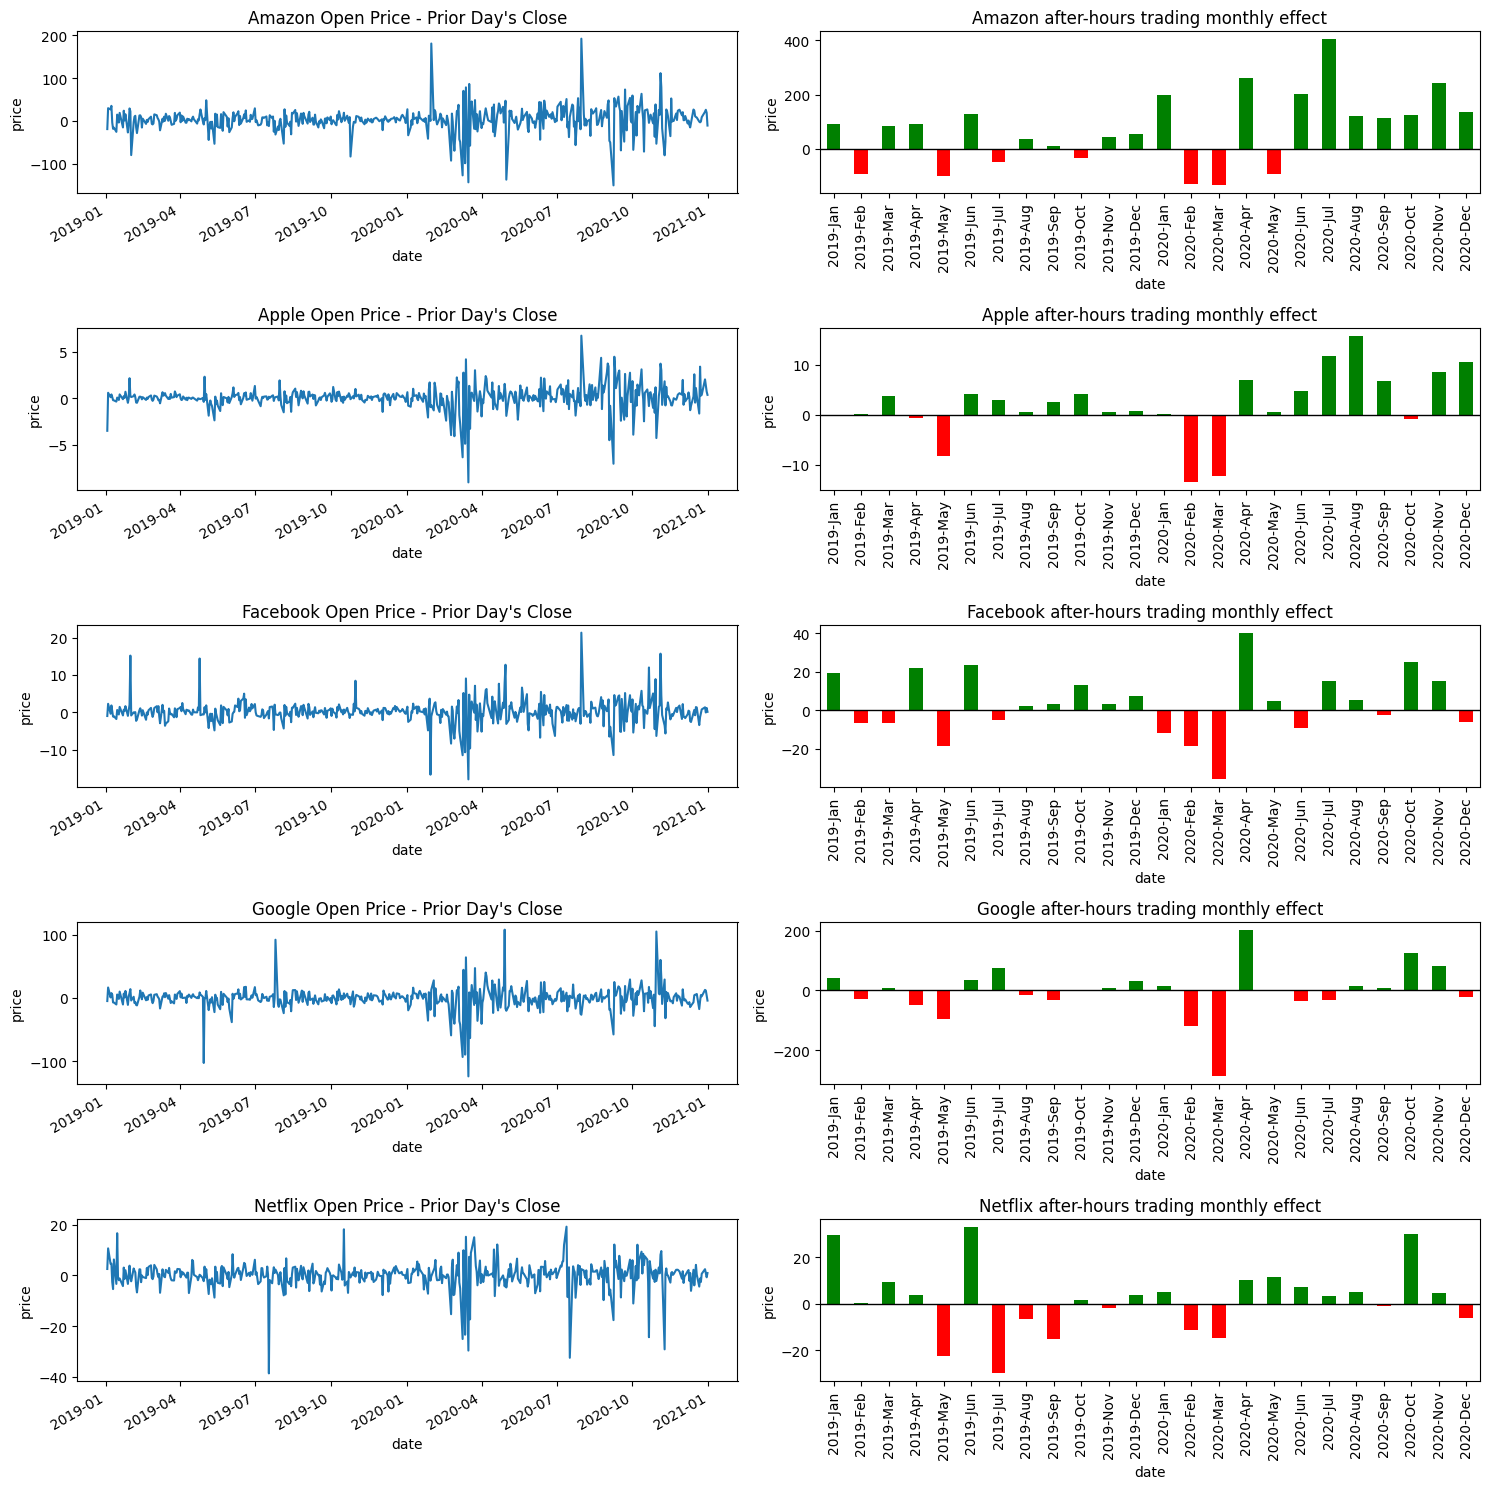

In [41]:
stock_analysis.AssetGroupVisualizer(faang).after_hours_trades()

C:\Users\fclplb8\AppData\Roaming\Python\Python310\site-packages\stock_analysis\stock_visualizer.py:258: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_effect = after_hours.resample('1M').sum()


array([<Axes: title={'center': "After-hours trading\n(Open Price - Prior Day's Close)"}, xlabel='date', ylabel='price'>,
       <Axes: title={'center': 'After-hours trading monthly effect'}, xlabel='date', ylabel='price'>],
      dtype=object)

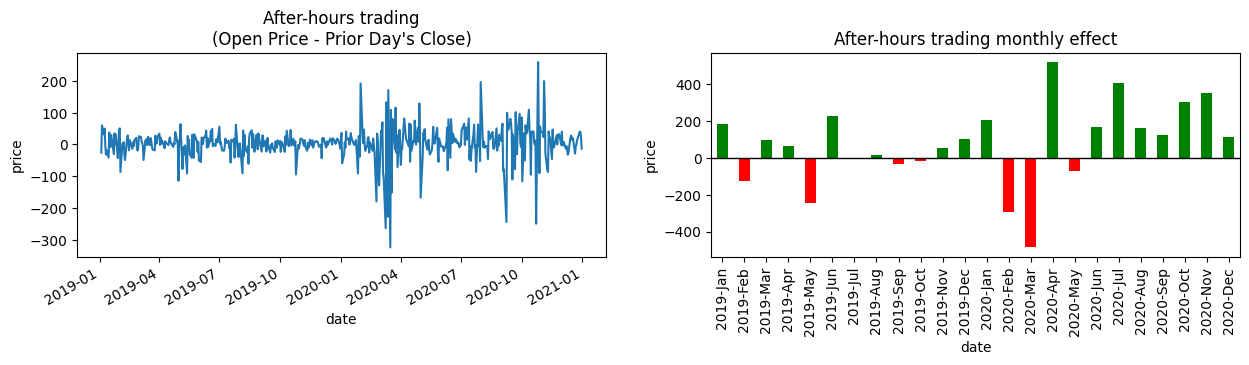

In [42]:
stock_analysis.StockVisualizer(make_portfolio(faang)).after_hours_trades()

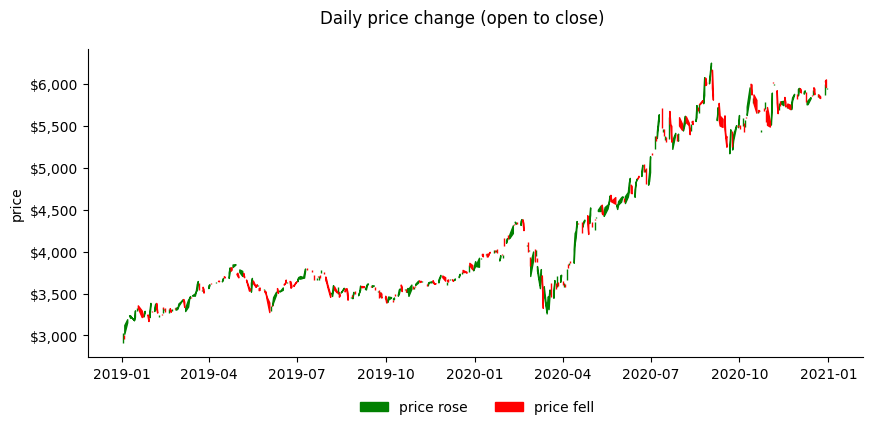

In [43]:
ax = stock_analysis.StockVisualizer(make_portfolio(faang)).open_to_close()
ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))

In [44]:
mutual_fund = group_stocks({
    '0 - sp500': sp,
    '1 - Facebook': fb,
    '2 - Apple': aapl,
    '3 - Amazon': amzn
})
stock_analysis.AssetGroupAnalyzer(mutual_fund).analyze('annualized_volatility')

{'0 - sp500': np.float64(0.34491195196047003),
 '1 - Facebook': np.float64(0.4584826019126009),
 '2 - Apple': np.float64(0.4670809643500883),
 '3 - Amazon': np.float64(0.3851099077041784)}

In [45]:
reader = stock_analysis.StockReader('2019-01-01', '2020-12-31')

def metric_table(stock, index, r_f):
    """
    Make a table of metrics for a stock.

    Parameters:
        - stock: The stock's dataframe.
        - index: The dataframe for the index.
        - r_f: Risk-free rate of return
     
    Returns:
        A `pandas.DataFrame` object with a single row of metrics
    """
    return pd.DataFrame({
        metric: getattr(
            stock_analysis.StockAnalyzer(stock), 
            metric
        )(**kwargs) \
        for metric, kwargs in {
            'alpha': {'index': index, 'r_f': r_f}, 
            'beta': {'index': index}, 
            'sharpe_ratio': {'r_f': r_f},
            'annualized_volatility': {},
            'is_bear_market': {},
            'is_bull_market': {}
        }.items()
    }, index=range(1))

# test out the function
metric_table(sp, sp, r_f=reader.get_risk_free_rate_of_return())

C:\Users\fclplb8\AppData\Roaming\Python\Python310\site-packages\stock_analysis\stock_analyzer.py:182: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start, end = df.close[0], df.close[-1]
C:\Users\fclplb8\AppData\Roaming\Python\Python310\site-packages\stock_analysis\stock_analyzer.py:232: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  self.cumulative_returns().last('1D').iat[0] - r_f
C:\Users\fclplb8\AppData\Roaming\Python\Python310\site-packages\stock_analysis\stock_analyzer.py:210: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  return self.portfolio_return(self.data.last('2M')) <= -.2
C:\Users\fclplb8\AppData\Roaming\Python\Python310\sit

,alpha,beta,sharpe_ratio,annualized_volatility,is_bear_market,is_bull_market
0,1.110223e-16,1.0,4.875434,0.344912,False,False
